In [1]:
# Loda Libraies
# Data Manipulation 
import numpy as np
import pandas as pd
 
# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
 
# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
 
# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
 
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
 
# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
 
# Plot the Figures Inline
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/user/Desktop/FDM/AIA/Data_Problem/dataset/adult_data.txt', header = None, sep=',\s', na_values=["?"])
test = pd.read_csv('/Users/user/Desktop/FDM/AIA/Data_Problem/dataset/adult_test.txt', header = None, sep=',\s', na_values=["?"])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
col = ['age', 'workclass', 'fnlwgt', 'edu', 'edu_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'caipital_loss', 'hours_pw', 'native_con', 'income']
data.columns = col
test.columns = col

In [4]:
#shape with unknowns
print(data.shape)
print(test.shape)

(32561, 15)
(16281, 15)


In [5]:
# delete the row with unknow values
data.dropna(inplace=True)
test.dropna(inplace=True)

In [6]:
#shape without unknowns
print(data.shape)
print(test.shape)

(30162, 15)
(15060, 15)


In [7]:
#head
data.head()

,age,workclass,fnlwgt,edu,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,caipital_loss,hours_pw,native_con,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test.head()

,age,workclass,fnlwgt,edu,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,caipital_loss,hours_pw,native_con,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [9]:
# class distribution
print(data.groupby('income').size())
print(test.groupby('income').size())

income
<=50K    22654
>50K      7508
dtype: int64
income
<=50K.    11360
>50K.      3700
dtype: int64


In [10]:
data.describe()

,age,fnlwgt,edu_num,capital_gain,caipital_loss,hours_pw
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.describe(include = ['object'])

,workclass,edu,marital_status,occupation,relationship,race,sex,native_con,income
count,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22286,9840,14065,4038,12463,25933,20380,27504,22654


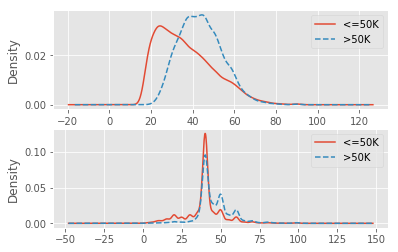

In [12]:
# For continuous
plt.style.use('ggplot')
fig, axes = plt.subplots(2,1)
#Draw the graph of income vs age
data['age'][data.income == '<=50K'].plot(kind = 'kde', label = '<=50K', ax = axes[0], legend = True, linestyle = '-')
data['age'][data.income == '>50K'].plot(kind = 'kde', label = '>50K', ax = axes[0], legend = True, linestyle = '--')
#Draw the graph of working hours vs age
data['hours_pw'][data.income == '<=50K'].plot(kind = 'kde', label = '<=50K', ax = axes[1], legend = True, linestyle = '-')
data['hours_pw'][data.income == '>50K'].plot(kind = 'kde', label = '>50K', ax = axes[1], legend = True, linestyle = '--')
plt.show()


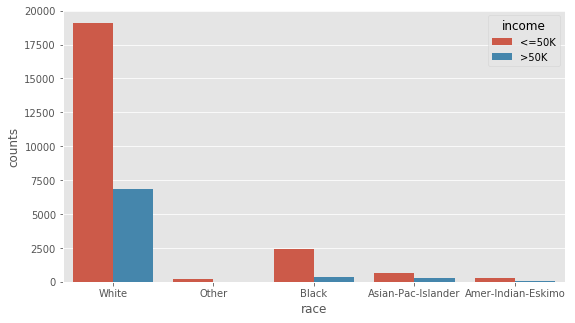

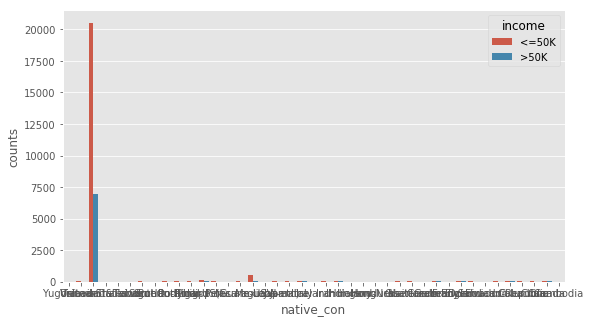

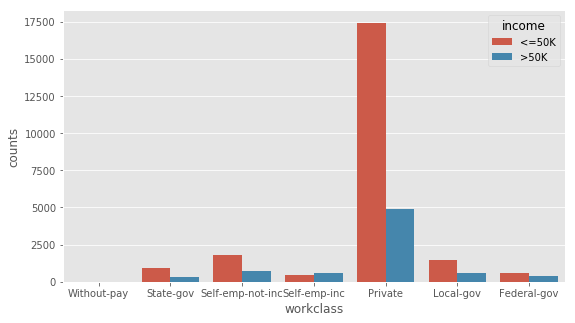

In [13]:
#For discrete - choose the 3 highest frequecy class
#For race
race = pd.DataFrame(data.groupby(by = ['race','income']).aggregate(np.size).loc[:,'age'])
race = race.reset_index()
race.rename(columns={'age':'counts'}, inplace=True)
race.sort_values(by = ['race','counts'], ascending=False, inplace=True)

#For native country
native_con = pd.DataFrame(data.groupby(by = ['native_con','income']).aggregate(np.size).loc[:,'age'])
native_con = native_con.reset_index()
native_con.rename(columns={'age':'counts'}, inplace=True)
native_con.sort_values(by = ['native_con','counts'], ascending=False, inplace=True)

#For work class
workclass = pd.DataFrame(data.groupby(by = ['workclass','income']).aggregate(np.size).loc[:,'age'])
workclass = workclass.reset_index()
workclass.rename(columns={'age':'counts'}, inplace=True)
workclass.sort_values(by = ['workclass','counts'], ascending=False, inplace=True)

#Draw the graphs
plt.figure(figsize=(9,5))
sns.barplot(x="race", y="counts", hue = 'income', data=race)
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(x="native_con", y="counts", hue = 'income', data=native_con)
plt.show()

plt.figure(figsize=(9,5))
sns.barplot(x="workclass", y="counts", hue = 'income', data=workclass)
plt.show()


In [14]:
#Encoding for discrete variables
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = pd.Categorical(data[feature]).codes
data.head()

for feature in test.columns:
    if test[feature].dtype == 'object':
        test[feature] = pd.Categorical(test[feature]).codes
test.head()

,age,workclass,fnlwgt,edu,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,caipital_loss,hours_pw,native_con,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


In [15]:
#Split the data
X_train = data.loc[:,'age':'native_con']
X_test = test.loc[:,'age':'native_con']
y_train = data['income']
y_test = test['income']

In [23]:
#Real num of people whose income >50K
y_test.sum()

3700

<font color = "blue" size = 3> $\textbf{Linear Regression Model:}$ </font>

In [16]:
# Build Linear Regression Model
lReg = LinearRegression()
lReg.fit(X_train, y_train)

# prediction of train
lReg_pred = lReg.predict(X_test)

#Prediction for >50K
over = sum(lReg.predict(X_test))
print('Predicted num of people will have >50K income is %d' %over)

# Socre of Model
print('Accuracy of model on train is %f' %lReg.score(X_train,y_train))
print('Accuracy of model on test is %f' %lReg.score(X_test,y_test))

# result of parameters
w = lReg.coef_ 
b = lReg.intercept_
#num of parameters
print(len(w))
#parameters
print([round(i,5) for i in w])
#intercept & bias
print(b) 

##Linear Regression Model is not suitable for the binary dependent variables.

Predicted num of people will have >50K income is 3779
Accuracy of model on train is 0.262476
Accuracy of model on test is 0.254131
14
[0.00519, -0.01484, 0.0, -0.00347, 0.0485, -0.023, 0.00118, -0.01599, 0.01516, 0.11168, 1e-05, 0.00011, 0.00345, -0.00059]
-0.5825781568139292


<font color = "blue" size = 3> $\textbf{Logistic Regression Model:}$ </font>

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
income      0     1
row_0              
0       10696  2577
1         664  1123
Predicted num of people will have >50K income is 1787
Accuracy of model on train is 0.786752
Accuracy of model on test is 0.784794


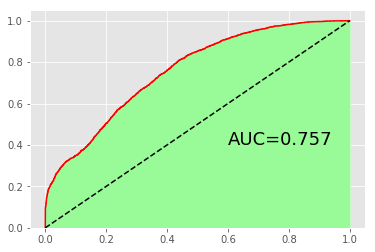

In [27]:
# Build Logistic Regression Model
logR = LogisticRegression()
logR.fit(X_train, y_train)
print(logR)

# prediction of train
logR_pred = logR.predict(X_test)
print(pd.crosstab(logR_pred, y_test))

#Prediction for >50K
over = sum(logR.predict(X_test))
print('Predicted num of people will have >50K income is %d' %over)

# Socre of Model
print('Accuracy of model on train is %f' %logR.score(X_train,y_train))
print('Accuracy of model on test is %f' %logR.score(X_test,y_test))

# Draw ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, logR.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
plt.stackplot(fpr, tpr, color = 'palegreen')
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()


<font color = "blue" size = 3> $\textbf{K Neighbors Model:}$ </font>

In [17]:
#Built K Neighbours Model
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
print(knc)

#Predict test
knc_pre = knc.predict(X_test)
print(pd.crosstab(knc_pre, y_test))

#Prediction for >50K
over = sum(knc.predict(X_test))
print('Predicted num of people will have >50K income is %d' %over)

#Score of model
print('Accuracy of model on train is %f' %knc.score(X_train,y_train))
print('Accuracy of model on test is %f' %knc.score(X_test,y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
income      0     1
row_0              
0       10364  2500
1         996  1200
Predicted num of people will have >50K income is 2196
Accuracy of model on train is 0.831742
Accuracy of model on test is 0.767862


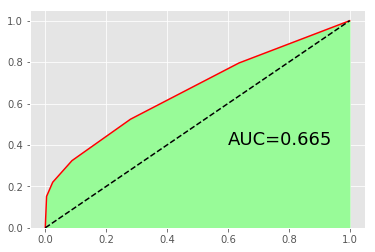

In [18]:
#ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, knc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
# Add shadow
plt.stackplot(fpr, tpr, color = 'palegreen')
#Radom guessing line
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
# Auc = area under ROC curve
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()

<font color = "blue" size = 3> $\textbf{GDBT Model:}$ </font>

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
income      0     1
row_0              
0       10787  1491
1         573  2209
Predicted num of people will have >50K income is 2782
Accuracy of model on train is 0.863868
Accuracy of model on test is 0.862948


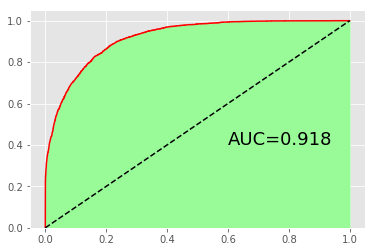

In [19]:
# Build GDBT Model
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)
print(gbdt)

# prediction of train
gbdt_pred = gbdt.predict(X_test)
print(pd.crosstab(gbdt_pred, y_test))

#Prediction for >50K
over = sum(gbdt.predict(X_test))
print('Predicted num of people will have >50K income is %d' %over)

# Socre of Model
print('Accuracy of model on train is %f' %gbdt.score(X_train,y_train))
print('Accuracy of model on test is %f' %gbdt.score(X_test,y_test))

# Draw ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, gbdt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
plt.stackplot(fpr, tpr, color = 'palegreen')
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()


<font color = "blue" size = 3> $\textbf{Naive Bayes Model:}$ </font>

income      0     1
row_0              
0       10740  2564
1         620  1136
Predicted num of people will have >50K income is 1756
Accuracy of model on train is 0.788476
Accuracy of model on test is 0.788579


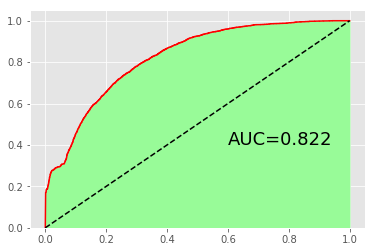

In [20]:
# Build Naive Bayes Model
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

# prediction of train
gaussianNB_pred = gaussianNB.predict(X_test)
print(pd.crosstab(gaussianNB_pred, y_test))

#Prediction for >50K
over = sum(gaussianNB.predict(X_test))
print('Predicted num of people will have >50K income is %d' %over)

# Socre of Model
print('Accuracy of model on train is %f' %gaussianNB.score(X_train,y_train))
print('Accuracy of model on test is %f' %gaussianNB.score(X_test,y_test))

# Draw ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, gaussianNB.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
plt.stackplot(fpr, tpr, color = 'palegreen')
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()

<font color = "blue" size = 3> $\textbf{Random Forset Model:}$ </font>

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of model on train is 0.987965
Accuracy of model on test is 0.844688
Predicted num of people will have >50K income is 2887


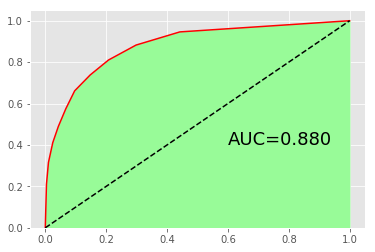

In [21]:
# Build Random Forest Model
ranFor = RandomForestClassifier()
ranFor.fit(X_train, y_train)

# prediction of train
ranFor_pred = ranFor.predict(X_test)

# Socre of Model
print('Accuracy of model on train is %f' %ranFor.score(X_train,y_train))
print('Accuracy of model on test is %f' %ranFor.score(X_test,y_test))

#Prediction for >50K
over = sum(ranFor.predict(X_test))
print('Predicted num of people will have >50K income is %d' %over)

# Draw ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, ranFor.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color = 'red')
plt.stackplot(fpr, tpr, color = 'palegreen')
plt.plot([0,1],[0,1], linestyle = 'dashed', color = 'black')
plt.text(0.6,0.4,'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict = dict(size = 18))
plt.show()